# Plant Disease Detection on 3 Plant leaves which are Potato , Tomato , Corn

In [1]:
#To load Google  Drive
from google.colab import drive


In [2]:
#To authorize access to my  google drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#To see the content present in the drive we have to execute below line
!ls "/content/drive/My Drive"

 90A350DC-817C-42B4-AF4B-A3D02029A44D.png
 90EF690E-C375-4D72-8FFC-86101DD1AB3D.png
'Activity Exemplar: Add estimation.gsheet'
'Activity Exemplar: Communication plan.gsheet'
'Activity Exemplar: Professional profile.gdoc'
'Activity Exemplar: Project budget.gsheet'
'Activity Exemplar: Project Move It OKRs.gdoc'
'Activity Exemplar: Project plan.gsheet'
'Activity Exemplar: RACI chart - Phase 2.gsheet'
'Activity Exemplar: ROAM Analysis.gsheet'
'Activity Exemplar: Stakeholder analysis and power grid.gslides'
'Activity Exemplar: Statement of Work (SoW).gdoc'
'Activity Exemplar: Status report.gsheet'
'Activity Exemplar: WBS Brainstorm Diagram.gslides'
'Activity: Sprint retro whiteboards.gslides'
'Activity Template: Adding estimation.gsheet'
'Activity Template: Communication plan (1).gsheet'
'Activity Template: Communication plan (2).gsheet'
'Activity Template: Communication plan (3).gsheet'
'Activity Template: Communication plan.gsheet'
'Activity Template: Communication plan.xlsx'
'Activity Te

In [4]:
pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 2.4 MB/s eta 0:00:00


# Importing Required Libraries for this Project 

In [5]:
import pandas as pd # for Dataframe handling 
import numpy as np # mathematical Computation
import matplotlib.pyplot as plt #to plot graphs
from matplotlib.image import imread 
import cv2  #for Image Processing
import random
import os
from os import listdir 
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from keras_preprocessing.image import img_to_array, array_to_img #to convert image to array for processing the model
from keras.optimizers import Adam  #
from keras.models import Sequential 
from keras.layers import Conv2D , MaxPooling2D #CNN model for Image processing 
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical #One hot Encoding to predict our target variable

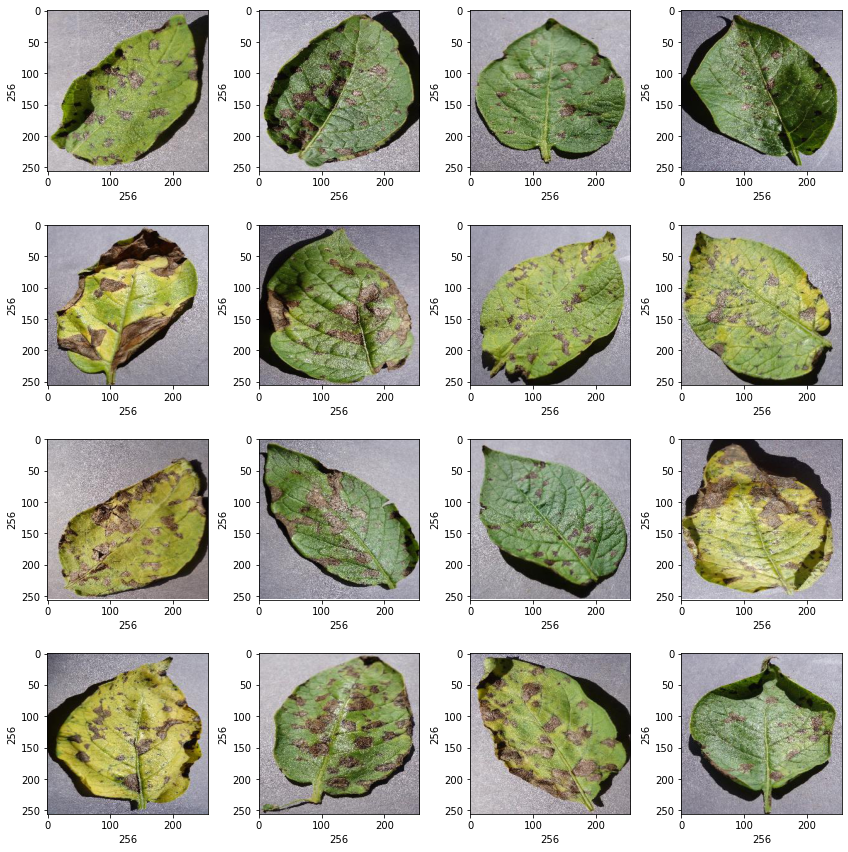

In [6]:
#Plotting 16 images to check the dataset
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/Plant_images_pianalytix/Potato___Early_blight"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout() #This function call adjusts the layout of the subplots to ensure that there is no overlap between the
  rand_img= imread(path +'/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1],fontsize=10) #width of the image
  plt.ylabel(rand_img.shape[0],fontsize=10) #height of the image

##### Below is a Python function that takes an image file path as input, reads in the image using OpenCV (cv2.imread), resizes it to a fixed size of 256x256 pixels using OpenCV (cv2.resize), converts it to a NumPy array using the Keras utility function img_to_array, and then returns the resulting NumPy array. If the image file cannot be read for some reason, the function returns an empty NumPy array (np.array([])).

In [7]:
# Creating a function which Converts Images to Numpy Array format
def convert_img_to_nparray(image_dir):

  try:
    image= cv2.imread(image_dir)
    if image is not None:
      image= cv2.resize(image,(256,256))
      return img_to_array(image)
    else:
        return np.array([])
  except Exception as e:
    print(f'Error : {e}')
    return None



In [8]:
# Converting image to np array using customised function
dir="/content/drive/MyDrive/Plant_images_pianalytix"
root_dir=listdir(dir)
image_list, label_list =[],[]
all_labels= ['Corn-Common_rust', 'Potato-Early_Blight', 'Tomato-Bacterial_spot']
binary_labels =[0,1,2]
temp=-1

#Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list= listdir(f"{dir}/{directory}")
  temp+=1
  for files in plant_image_list:
    image_path=f"{dir}/{directory}/{files}"
    image_list.append(convert_img_to_nparray(image_path))
    label_list.append(binary_labels[temp])

In [9]:
#looking for data is balanced or imbalanced
label_counts=pd.DataFrame(label_list).value_counts()
label_counts

0    300
1    300
2    300
dtype: int64

In [10]:
#Looking for Shape of the image which is 256 X 256 X 3 pixels
image_list[0].shape

(256, 256, 3)

In [11]:
#looking for Total number of label list
len(label_list)

900

In [12]:
#Lets divide the data in train test with 20% test size
x_train , x_test , y_train , y_test = train_test_split(image_list,label_list,test_size= 0.2 , random_state=10)

###### Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.

In [13]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape(-1,256,256,3)
x_test= x_test.reshape(-1,256,256,3)

In [14]:
y_train=to_categorical(y_train)
y_test= to_categorical(y_test)

# Model Building using CNN

#### We will create a network architecture for the model. We will use different types of layers according to their features namely Conv_2d (It is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor), max_pooling2d (It is a downsampling technique which takes out the maximum value over the window defined by poolsize), flatten (It flattens the input and creates a 1D output), Dense (Dense layer produce the output as the dot product of input and kernel).


In [15]:
model= Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3), padding='same', input_shape=(256,256,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(filters=16,kernel_size=(3,3), padding='same', activation='relu'))   
model.add(MaxPooling2D(pool_size=(3,3))) 
model.add(Flatten())
model.add(Dense(8,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()              

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 8)                 1

### While compiling the model we need to set the type of loss which will be Categorical Crossentropy for our model along with this we also need to set the optimizer and the metrics respectively.

In [16]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001),metrics=['accuracy'])

In [17]:
#Splitting data to train the model and validate it
x_train,x_val,y_train,y_val= train_test_split(x_train,y_train,test_size=0.2,random_state=0)

# Fitting the model with the data and finding out the accuracy at each epoch to see how our model is learning. Now we will train our model on 100 epochs and a batch size of 128. During each epochs we can see how the model is performing by viewing the training and validation accuracy.

In [18]:
#Training the model
epochs=100
batch_size=128
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_val,y_val))

Epoch 1/100
5/5 [==============================] - 47s 9s/step - loss: 1.1232 - accuracy: 0.3490 - val_loss: 1.0787 - val_accuracy: 0.3194
Epoch 2/100
5/5 [==============================] - 43s 9s/step - loss: 1.0578 - accuracy: 0.3455 - val_loss: 1.0464 - val_accuracy: 0.3194
Epoch 3/100
5/5 [==============================] - 40s 8s/step - loss: 1.0212 - accuracy: 0.3455 - val_loss: 1.0081 - val_accuracy: 0.3194
Epoch 4/100
5/5 [==============================] - 39s 8s/step - loss: 0.9813 - accuracy: 0.3524 - val_loss: 0.9682 - val_accuracy: 0.3611
Epoch 5/100
5/5 [==============================] - 43s 8s/step - loss: 0.9395 - accuracy: 0.4566 - val_loss: 0.9262 - val_accuracy: 0.5556
Epoch 6/100
5/5 [==============================] - 38s 8s/step - loss: 0.8947 - accuracy: 0.5938 - val_loss: 0.8865 - val_accuracy: 0.5903
Epoch 7/100
5/5 [==============================] - 40s 8s/step - loss: 0.8516 - accuracy: 0.6233 - val_loss: 0.8433 - val_accuracy: 0.6042
Epoch 8/100
5/5 [==========

#### Saving the model weights , architecture in h5 file and json file

In [21]:
model.save("/content/drive/My Drive/Plant_Disease.h5")
#serialize model to json
json_model=model.to_json
#save the model architecture to JSON file
with open('/content/drive/My Drive/plant_model.json','w') as json_file:
  json_file.write(str(json_model))
#saving the weights of the model
model.save_weights('/content/drive/My Drive/plant_model_weights.h5')


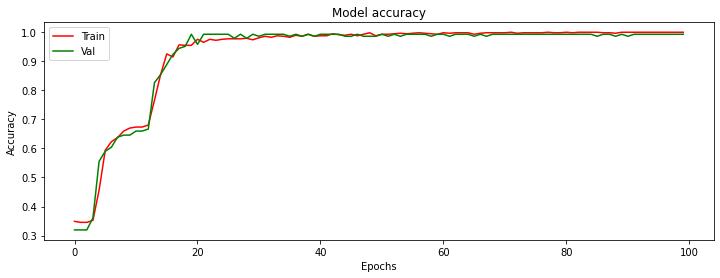

In [22]:
#Plot the training history
plt.figure(figsize=(12,4))
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='g')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Val'])
plt.show()

In [23]:
print('[INFO] Calculating Test Model Accuracy')
scores = model.evaluate(x_test,y_test)
print(f"Test Accuracy:{scores[1]*100}")


[INFO] Calculating Test Model Accuracy
6/6 [==============================] - 4s 668ms/step - loss: 0.0260 - accuracy: 0.9833
Test Accuracy:98.33333492279053


In [24]:
#Evaluating model to know the accuracy
y_pred= model.predict(x_test)

6/6 [==============================] - 4s 612ms/step


#Plotting Image to compare the results

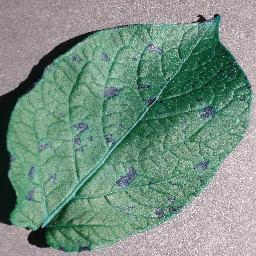

In [27]:
img=array_to_img(x_test[12])
img

# Printing out the original and the predicted label

In [28]:
# Finding max value fom prediction list and comparing original vs predicted image
print("Original:", all_labels[np.argmax(y_test[12])])
print("Predicted:",all_labels[np.argmax(y_pred[12])])

Original: Tomato-Bacterial_spot
Predicted: Tomato-Bacterial_spot


# Conclusion

### We started with loading the dataset into google colab using google drive and visualizing the images. Normalizing is an important step when working with any type of dataset. After that we created a CNN Model which is further used for predicting the plant diseases using the image supplied to model.
### This model is highly beneficial as it can be used by different agricultural firms and farmers to increase their yield and stop wastage of crops due to disease.